In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
df_coreness = pd.read_csv("coreness_igos.csv")
df_coreness

,id,coreness
0,angola,0.125000
1,pakistan,0.767857
2,zambia,0.086364
3,madagascar,0.215909
4,saudiarabia,0.247727
...,...,...
133,uzbekistan,0.004545
134,kyrgyzstan,0.006818
135,elsalvador,0.022727
136,tajikistan,0.000000


In [3]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
df_happiness = pd.read_csv("2015.csv")
df_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
notacao_diff = {
    "unitedstates": "usa",
    "unitedkingdom": "uk",
    "centralafricanrepublic": "car",
    "southkorea": "sokorea",
    "czechrepublic": "czechrep",
    "southafrica": "soafrica",
    "dominicanrepublic": "domrepublic",
    "macedonia": "fyromacedonia",
    "unitedarabemirates": "uae",
}

def clean_countrys(country):
    country = country.lower().replace("\n", "").replace(" ", "")
    if country in notacao_diff:
        return notacao_diff[country]
    return country

In [6]:
df_happiness['Country'] = df_happiness["Country"].apply(clean_countrys)
df_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
# Confirma que nao há diferenca nos ids dos dois datasets
df_coreness.loc[~df_coreness.id.isin(df_happiness["Country"])]

,id,coreness


In [8]:
data = df_coreness.merge(df_happiness, how='inner', left_on='id', right_on='Country')
data

,id,coreness,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,angola,0.125000,angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
1,pakistan,0.767857,pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
2,zambia,0.086364,zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
3,madagascar,0.215909,madagascar,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
4,saudiarabia,0.247727,saudiarabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,uzbekistan,0.004545,uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
134,kyrgyzstan,0.006818,kyrgyzstan,Central and Eastern Europe,77,5.286,0.03823,0.47428,1.15115,0.65088,0.43477,0.04232,0.30030,2.23270
135,elsalvador,0.022727,elsalvador,Latin America and Caribbean,42,6.130,0.05618,0.76454,1.02507,0.67737,0.40350,0.11776,0.10692,3.03500
136,tajikistan,0.000000,tajikistan,Central and Eastern Europe,106,4.786,0.03198,0.39047,0.85563,0.57379,0.47216,0.15072,0.22974,2.11399


In [10]:
# Country	 Happiness
result = reg.linear(data=data, formula='Q("Happiness Score") ~ coreness')
result.micro_summary()

variable,coefficient,std error,p-value
coreness,0.636801,0.326693,0.053325


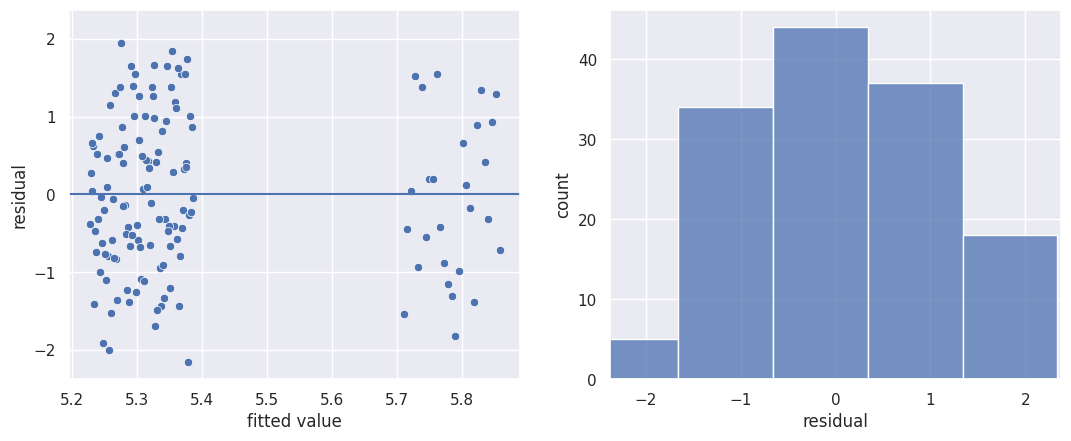

In [11]:
result.plot_residuals()